# ABEL linac tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys, copy
sys.path.append('../')
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2d()
#stage.enable_transverse_instability = True
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5
stage.enable_radiation_reaction = False

# define first stage (half length)
first_stage = copy.deepcopy(stage)
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.005
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 6000
source.jitter.t = driver.jitter.t

main_gamma = energy2gamma(source.energy)
main_sigma_x = np.sqrt(source.emit_nx/main_gamma*source.beta_x)  # [m]
main_sigma_y = np.sqrt(source.emit_ny/main_gamma*source.beta_y)  # [m]
source.x_offset = main_sigma_x*0.1  # [m]
source.y_offset = main_sigma_y*0.1  # [m]

# define interstage
interstage = InterstageBasic() # InterstageElegant()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5  # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulations

In [3]:
linac.run('linac_example', num_shots=1, overwrite=True, parallel=False);

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 5.0 GeV, -1.60 nC, 0.5% rms, 159.0/0.6 µm-rad)
Tracking element 2 (StageQuasistatic2d, stage 1, s = 2.5 m, 21.2 GeV, -1.60 nC, 3.6% rms, 158.0/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 9.4 m, 21.2 GeV, -1.60 nC, 3.6% rms, 158.2/0.6 µm-rad)
Tracking element 4 (StageQuasistatic2d, stage 2, s = 14.4 m, 53.4 GeV, -1.60 nC, 3.1% rms, 158.8/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 25.4 m, 53.4 GeV, -1.60 nC, 3.1% rms, 158.7/0.6 µm-rad)
Tracking element 6 (StageQuasistatic2d, stage 3, s = 30.4 m, 85.5 GeV, -1.60 nC, 2.6% rms, 159.5/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 44.4 m, 85.5 GeV, -1.60 nC, 2.6% rms, 159.5/0.6 µm-rad)
Tracking element 8 (StageQuasistatic2d, stage 4, s = 49.4 m, 117.5 GeV, -1.60 nC, 2.2% rms, 159.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 65.7 m, 117.5 GeV, -1.60 nC, 2.2% rms, 159.3/0.6 µm-rad)
Tracking element 10 (StageQuasistatic2d,

### Plot the wakefield

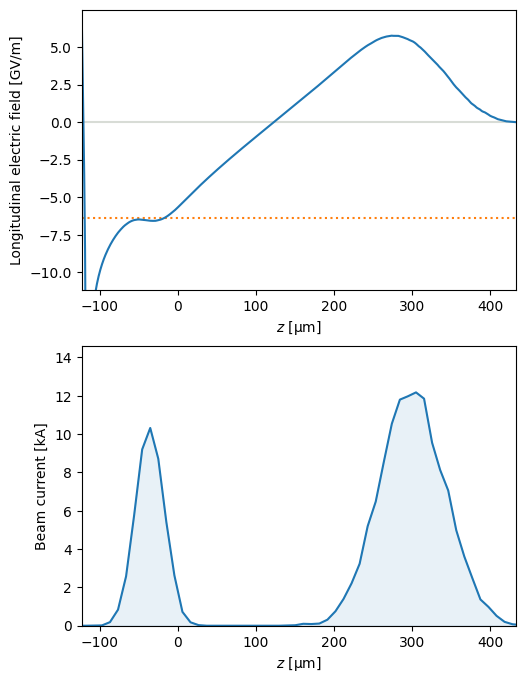

In [4]:
# plot the first-stage wakefield
linac.stages[0].plot_wakefield()

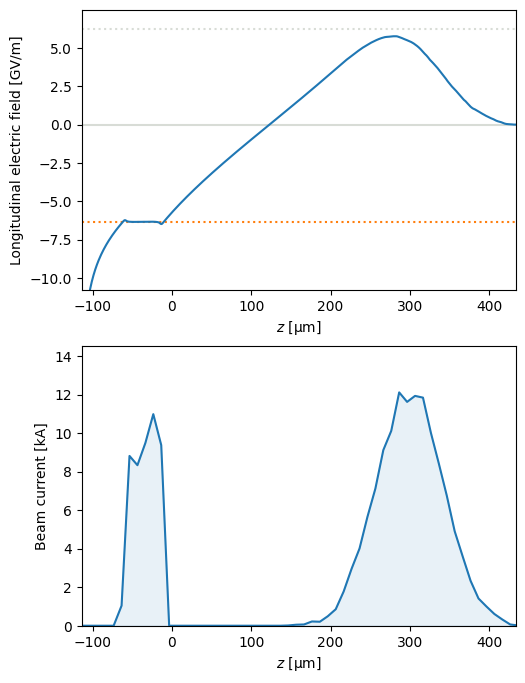

In [5]:
# plot the last-stage wakefield
linac.stages[-1].plot_wakefield()

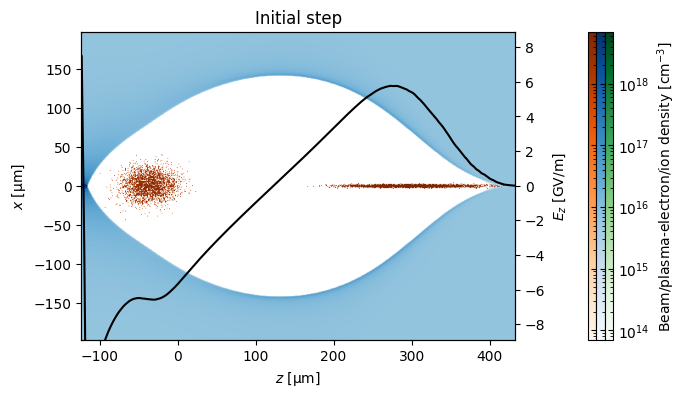

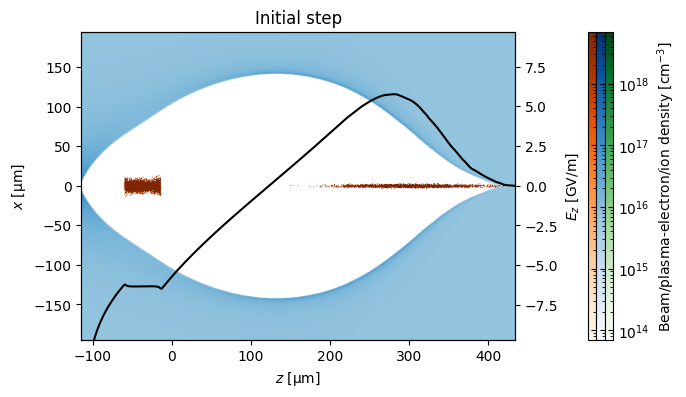

In [6]:
linac.stages[0].plot_wake()
linac.stages[-1].plot_wake()

### Plot beam evolution and survey

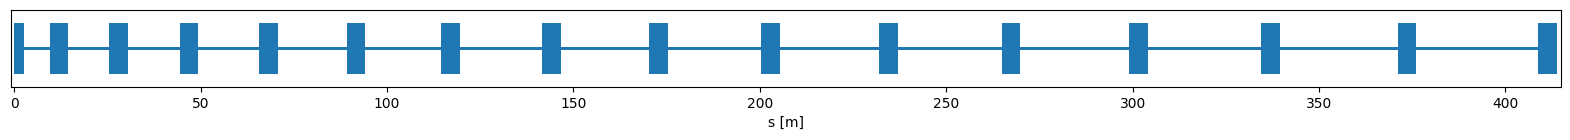

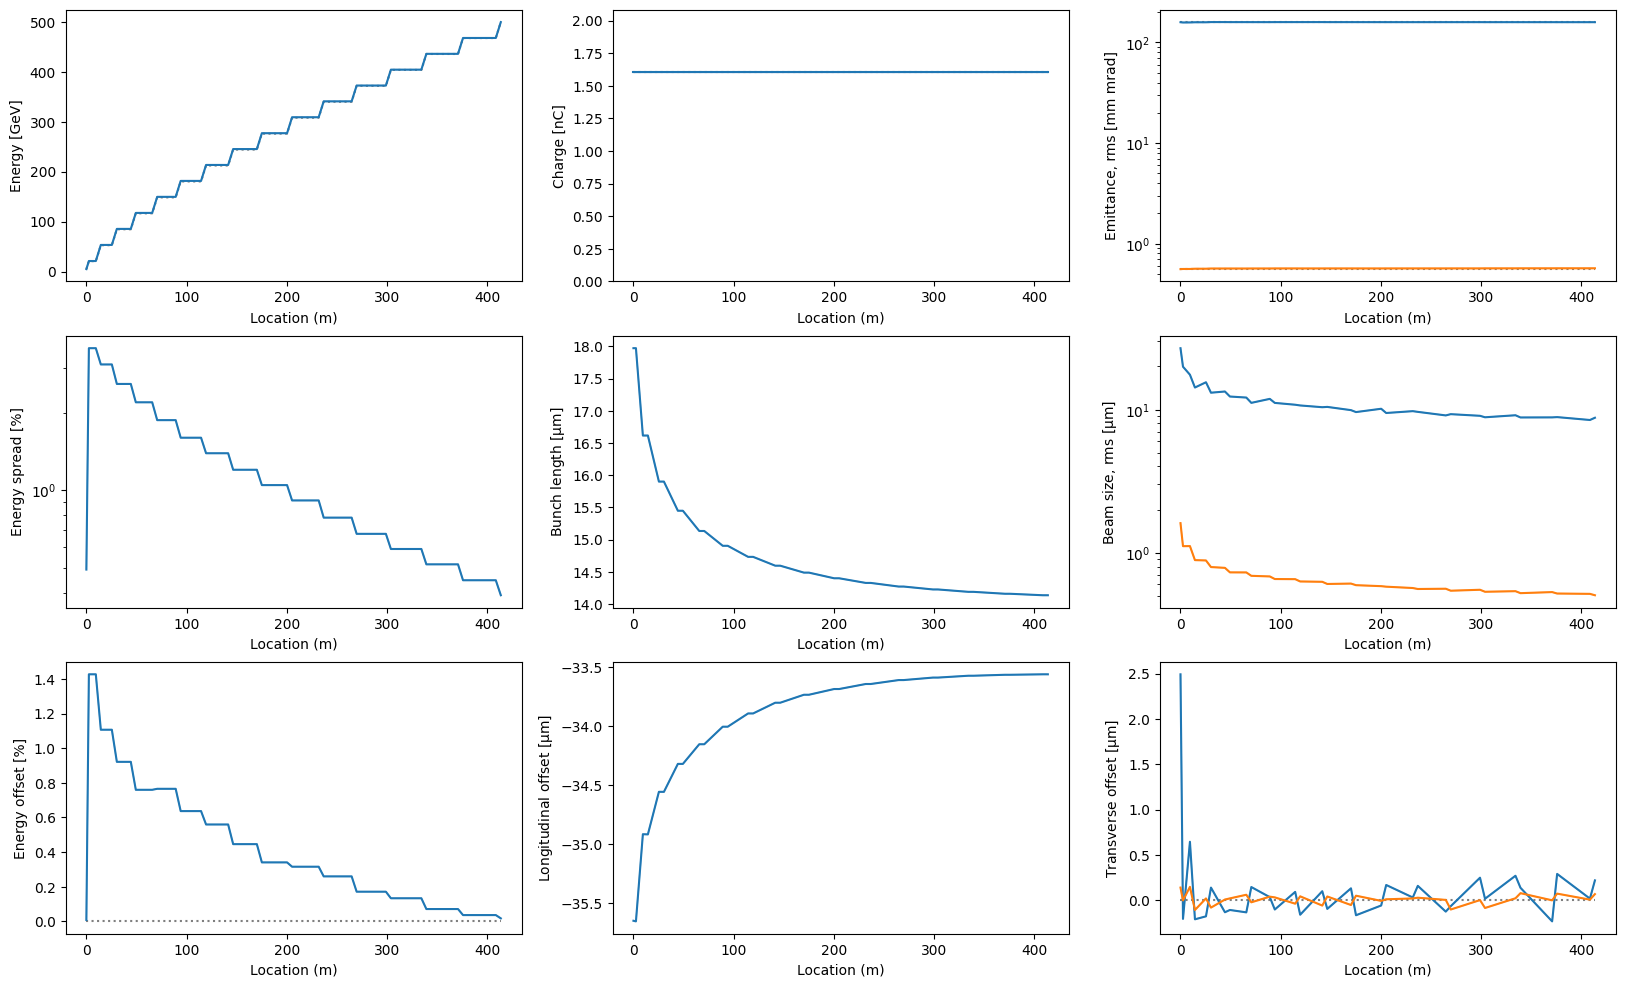

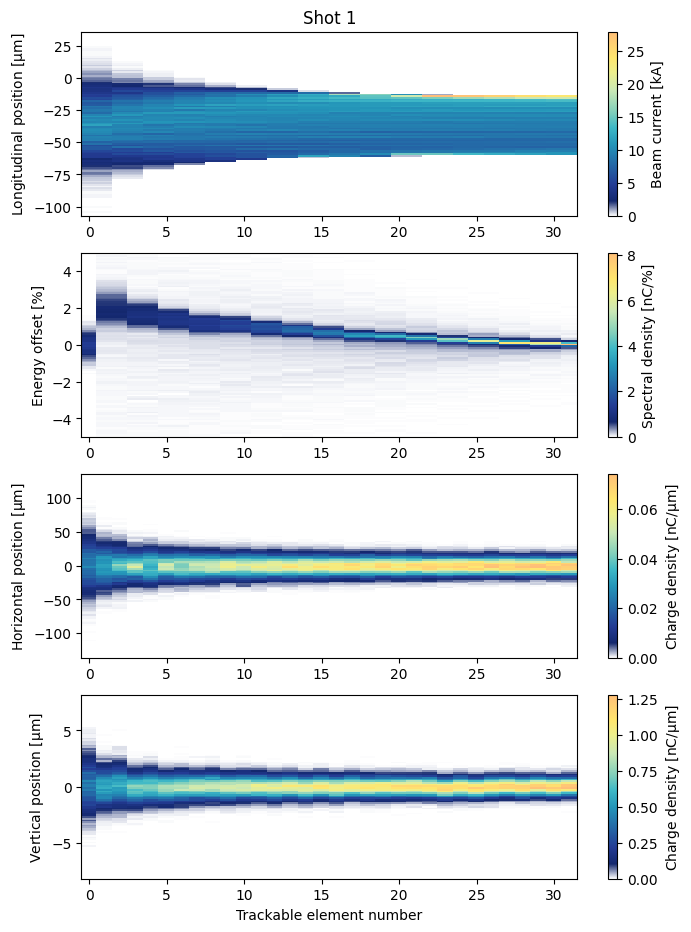

In [7]:
# plot linac survey
linac.plot_survey()

# plot beam evolution
linac.plot_evolution(use_stage_nums=False)
linac[0].plot_waterfalls()

In [8]:
linac.animate_lps()

'run_data/linac_example/plots/lps_shot0.gif'

![](run_data/linac_example/plots/lps_shot0.gif)